На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый
Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

**Задания:**
1. Выберите метод, который предположительно подойдет в первом вопросе.
- Проверьте, являются ли дисперсии внутри групп гомогенными.
- Проведите тест на нормальность распределения.
- Сравните средние в представленных группах.
- Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
- Примите решение: какие картинки в итоге будем использовать?
- Выберите метод для второго теста.
- Визуализируйте распределение events для контрольной и тестовой групп. 
- Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 
- Выберите формулу для модели, проведите тест.  
**Описание данных**

**5_task_1**
- id – id клиента в эксперименте
- group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
- events – сколько блюд суммарно было заказано за период   

**5_task_2:**
- id – id клиента в эксперименте
- segment – сегмент (high/low)
- group – вид кнопки (control – старая версия, test – новая версия)
- events – сколько блюд суммарно было заказано за период

https://stepik.org/media/attachments/lesson/385920/5_task_1.csv


Итак, первая задача: нужно проверить, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в среднем покупали больше всего. Всего пользователям показывались три варианта:

A – прямоугольные 16:9
B – квадратные
C – прямоугольные 12:4
Каким статистическим тестом нужно воспользоваться для сравнения средних в данном случае?

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize' :(16, 6)}, style = 'whitegrid')

import scipy.stats as stats

import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [2]:
df=pd.read_csv('https://stepik.org/media/attachments/lesson/385920/5_task_1.csv')

In [3]:
df

id group  events
0      16046     A      14
1      18712     A      41
2       3268     A      30
3      22633     A      37
4      28071     A      38
...      ...   ...     ...
29995  22932     C      38
29996  21787     C      25
29997   5054     C      34
29998  10254     C      27
29999   5692     C      49

[30000 rows x 3 columns]

In [5]:
df_A=df.query('group=="A"')

In [7]:
df_B=df.query('group=="B"')

In [6]:
df_C=df.query('group=="C"')

In [8]:
df_A.events.mean()

29.5796

In [9]:
df_B.events.mean()

37.6136

In [10]:
df_C.events.mean()

27.4703

Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.
Hint: scipy.stats.levene

p-value < 0.05, отклоняем нулевую гипотезу
p-value > 0.05, не отклоняем нулевую гипотезу


In [14]:
stats.levene(df_A.events,df_B.events,df_C.events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

Также убедитесь, что данные распределены нормально, применив тест Шапиро-Уилка. Перед применением критерия при проверке на нормальность обязательно сделайте семплирование (1000 наблюдений), так как на больших выборках могут получаться неверные результаты. Для воспроизводимости результата используйте параметр random_state=17 в методе sample.
Распределение events в группе B является нормальным
Распределение events в группе C является нормальным
Распределение events в группе A является нормальным
Все утверждения не верны

In [16]:
stats.shapiro(df_A.events.sample(1000,random_state=17))

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [17]:
stats.shapiro(df_B.events.sample(1000,random_state=17))

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [18]:
stats.shapiro(df_C.events.sample(1000,random_state=17))

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

Все 3 выборки  имеют признаки нормального распределения, тк pvalue>0.05

<AxesSubplot:xlabel='events', ylabel='Count'>

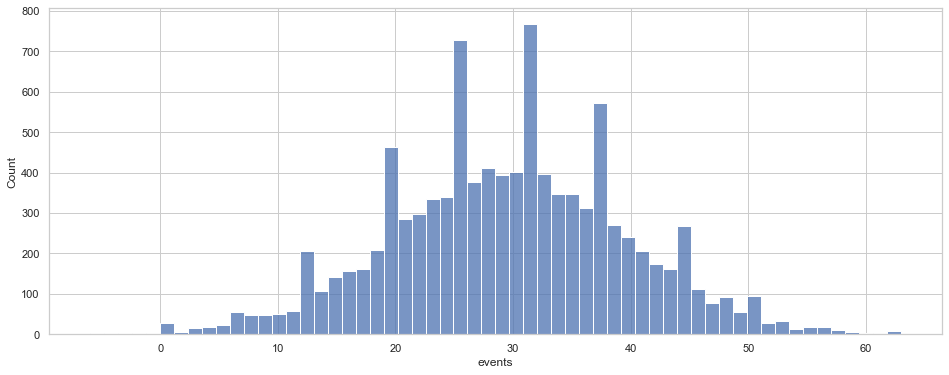

In [41]:
sns.histplot(data=df_A,x='events')

<AxesSubplot:xlabel='events', ylabel='Count'>

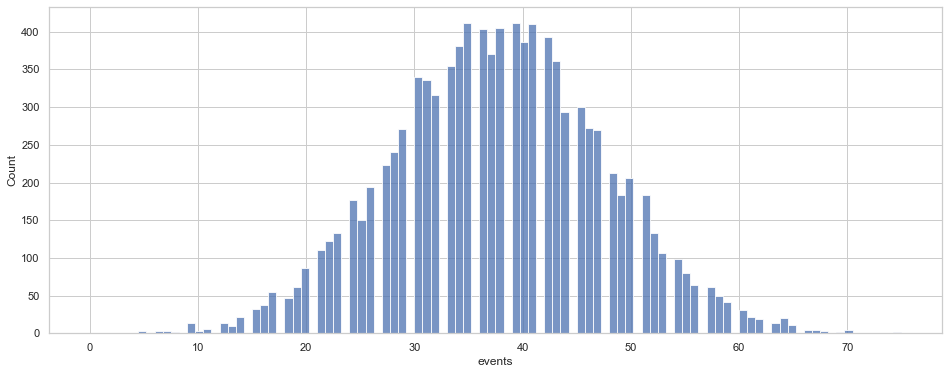

In [40]:
sns.histplot(data=df_B,x='events',bins=100)

<AxesSubplot:xlabel='events', ylabel='Count'>

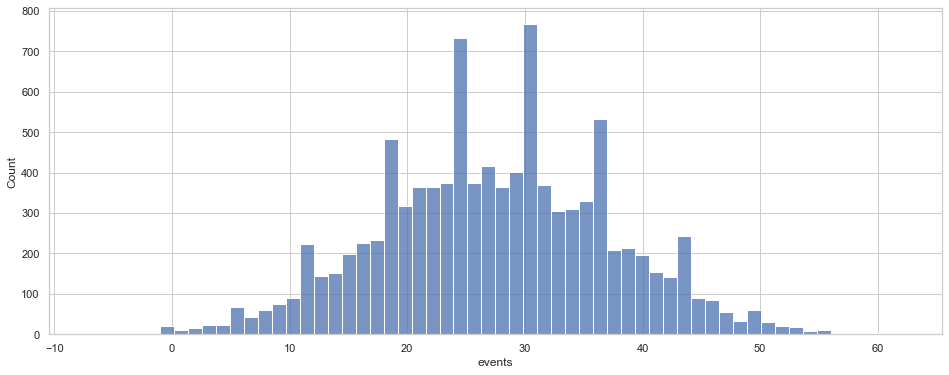

In [39]:
sns.histplot(data=df_C,x='events')

 однофакторный дисперсионный анализ

In [28]:
one_way_ANOVA=stats.f_oneway(df_A.events,df_B.events,df_C.events)
print('pvalue = ',one_way_ANOVA[1])
if one_way_ANOVA[1]<0.05:
    print('Reject H0 about equal mean in all third group')
else:
    print('Not Reject H0')

pvalue =  0.0
Reject H0 about equal mean in all third group


Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия

In [30]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

print(pairwise_tukeyhsd(df.events, df.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034  -0.0   7.7038  8.3642   True
     A      C  -2.1093  -0.0  -2.4395 -1.7791   True
     B      C -10.1433  -0.0 -10.4735 -9.8131   True
----------------------------------------------------


In [31]:
# первая переменая события, второй группы,  meandiff - разница средних групп. 
# во всех случаях отклоняем нулевую гипотезу, т.к. reject = True

In [35]:
MultiComp = MultiComparison(df.events, df.group)

print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034  -0.0   7.7038  8.3642   True
     A      C  -2.1093  -0.0  -2.4395 -1.7791   True
     B      C -10.1433  -0.0 -10.4735 -9.8131   True
----------------------------------------------------


Text(0, 0.5, 'Число покупок')

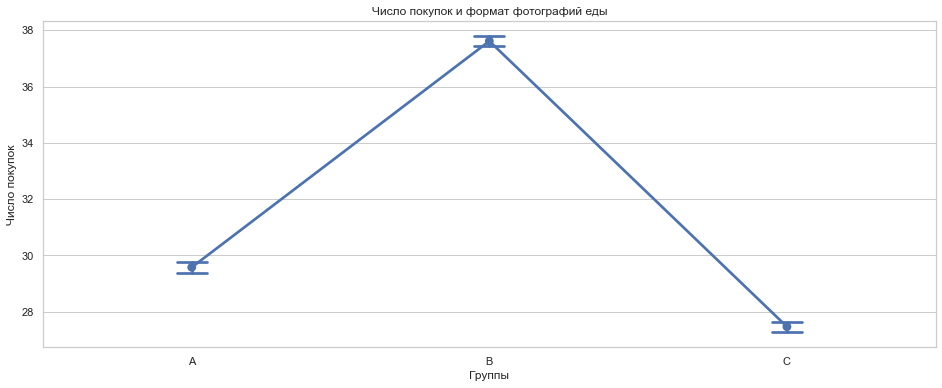

In [46]:
sns.pointplot(x = 'group', y = 'events',data = df, capsize = .1)
plt.title("Число покупок и формат фотографий еды")
plt.xlabel('Группы')
plt.ylabel('Число покупок')


# По графику делаем вывод что наибольшее число покупок даёт группа В-квадратные картинки

Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

In [47]:

df2=pd.read_csv('https://stepik.org/media/attachments/lesson/385920/5_task_2.csv')

In [48]:
df2

id    group segment  events
0      83440     test    high    78.0
1      96723     test    high    71.0
2      68719     test    high    80.0
3      50399     test    high    80.0
4      95613     test    high    78.0
...      ...      ...     ...     ...
99995  60695  control     low    15.0
99996   5934  control     low    16.0
99997  30046  control     low    22.0
99998  26474  control     low    21.0
99999  42649  control     low    23.0

[100000 rows x 4 columns]

In [53]:
df2.groupby(['group','segment'],as_index=False).agg({'id':'count'}).pivot(index='segment',columns='group', values='id').reset_index()

group segment  control   test
0        high    10000  10000
1         low    40000  40000

Для начала визуализируйте распределение events для контрольной и тестовой групп

In [64]:
df_test=df2.query('group=="test"')

<AxesSubplot:xlabel='events', ylabel='Count'>

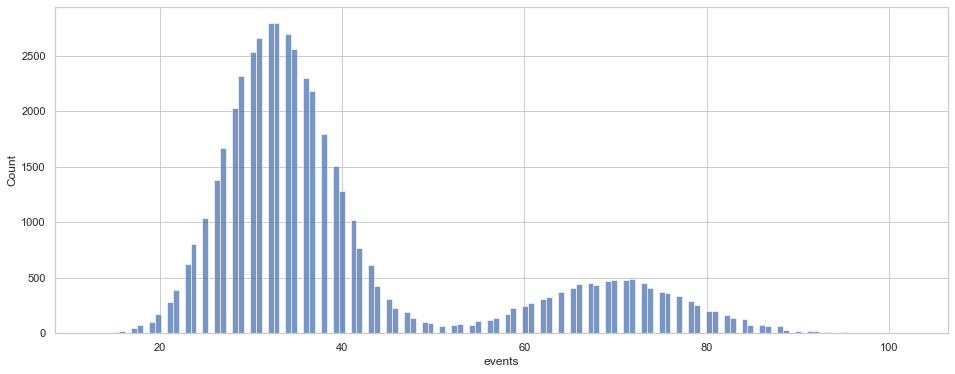

In [65]:
sns.histplot(data=df_test,x='events')

In [67]:
df_control=df2.query('group=="control"')

<AxesSubplot:xlabel='events', ylabel='Count'>

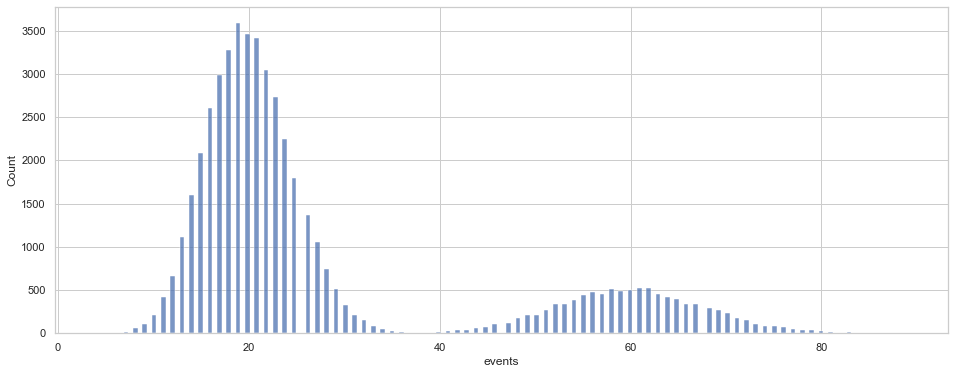

In [68]:
sns.histplot(data=df_control,x='events')

Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя.


In [71]:
df2.groupby(['group','segment'],as_index=False).agg({'events':['mean','median','std']}).reset_index()

index    group segment     events                 
                               mean median       std
0     0  control    high  59.970800   60.0  7.805347
1     1  control     low  20.031575   20.0  4.473576
2     2     test    high  69.938500   70.0  8.403974
3     3     test     low  33.025925   33.0  5.720845

Проведите тест, а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.
В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison:
Между какими группами были обнаружены статистически значимые различия?

In [73]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'events ~ group + segment + group:segment'
model = ols(formula, df2).fit()
aov_table = anova_lm(model, typ=2)

In [74]:
print(aov_table)

                     sum_sq       df              F         PR(>F)
group          3.837195e+06      1.0  112031.864120   0.000000e+00
segment        2.362480e+07      1.0  689756.377485   0.000000e+00
group:segment  3.664244e+04      1.0    1069.823273  2.060261e-233
Residual       3.424956e+06  99996.0            NaN            NaN


In [80]:
df2['combination'] = df2['group'] + '\\' + df2['segment']
df2.head()

id group segment  events combination
0  83440  test    high    78.0   test\high
1  96723  test    high    71.0   test\high
2  68719  test    high    80.0   test\high
3  50399  test    high    80.0   test\high
4  95613  test    high    78.0   test\high

In [82]:
#Как по таблице понять, где различия значимые?
#Смотрим на столбец reject. Если там стоит True - различия значимые
df2_summary = pairwise_tukeyhsd(df2.events, df2.combination).summary()
print(df2_summary)

print('Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13')

print('Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой')

print('Разница между control/high и test/high составила около 10')



      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control\high control\low -39.9392  -0.0 -40.1073 -39.7711   True
control\high   test\high   9.9677  -0.0   9.7551  10.1803   True
control\high    test\low -26.9449  -0.0  -27.113 -26.7768   True
 control\low   test\high  49.9069  -0.0  49.7388   50.075   True
 control\low    test\low  12.9944  -0.0   12.888  13.1007   True
   test\high    test\low -36.9126  -0.0 -37.0807 -36.7445   True
----------------------------------------------------------------
Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13
Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой
Разница между control/high и test/high составила около 10


Визуализируйте результаты теста и заполните пропуски: Фактор group оказался значимым, фактор segment – значимым, их взаимодействие – значимо. 

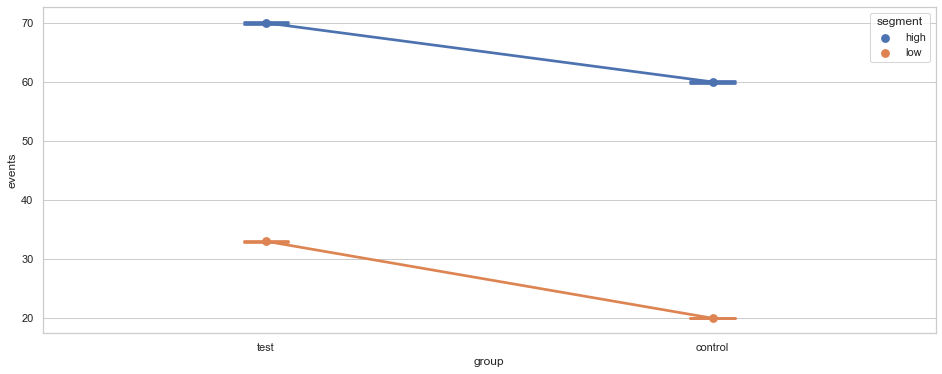

In [83]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = df2, capsize = .1)
plt.show()

# Судя по графику, для всех групп среднее значение events увеличилось , поэтому решение: выкатываем новую версию